In [1]:
from IPython.display import Image

## Q1. Notebook

We'll start with the same notebook we ended up with in homework 1.
We cleaned it a little bit and kept only the scoring part. You can find the initial notebook [here](homework/starter.ipynb).

Run this notebook for the March 2023 data.

What's the standard deviation of the predicted duration for this dataset?

* 1.24
* 6.24
* 12.28
* 18.28

In [2]:
!pip freeze | grep scikit-learn

scikit-learn @ file:///tmp/build/80754af9/scikit-learn_1642617106979/work
scikit-learn-intelex==2021.20220215.212715


In [3]:
!python -V

Python 3.9.12


In [4]:
import pickle
import pandas as pd

In [5]:
with open('./description_homework/model.bin', 'rb') as f_in:
    dv, model = pickle.load(f_in)

/home/aleksandr/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DictVectorizer from version 1.5.0 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/aleksandr/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LinearRegression from version 1.5.0 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [6]:
categorical = ['PULocationID', 'DOLocationID']

def read_data(filename):
    df = pd.read_parquet(filename)
    
    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df['duration'] = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    df[categorical] = df[categorical].fillna(-1).astype('int').astype('str')
    
    return df

In [ ]:
# df = read_data('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-03.parquet')

In [7]:
df = read_data('../01-intro/data/yellow_tripdata_2023-03.parquet')

In [8]:
dicts = df[categorical].to_dict(orient='records')
X_val = dv.transform(dicts)
y_pred = model.predict(X_val)

In [11]:
y_pred.std()

6.247488852238703

## ***Answer for Q1:==*** 6.24

## Q2. Preparing the output

Like in the course videos, we want to prepare the dataframe with the output. 

First, let's create an artificial `ride_id` column:

```python
df['ride_id'] = f'{year:04d}/{month:02d}_' + df.index.astype('str')
```

Next, write the ride id and the predictions to a dataframe with results. 

Save it as parquet:

```python
df_result.to_parquet(
    output_file,
    engine='pyarrow',
    compression=None,
    index=False
)
```

What's the size of the output file?

* 36M
* 46M
* 56M
* 66M

__Note:__ Make sure you use the snippet above for saving the file. It should contain only these two columns. For this question, don't change the
dtypes of the columns and use `pyarrow`, not `fastparquet`. 

In [12]:
year = 2023
month = 3

df['ride_id'] = f'{year:04d}/{month:02d}_' + df.index.astype('str')

In [13]:
df['ride_id'].head()

0    2023/03_0
1    2023/03_1
2    2023/03_2
3    2023/03_3
4    2023/03_4
Name: ride_id, dtype: object

In [14]:
df['predictions'] = y_pred

In [15]:
output_file = 'submition.parquet'  # замените на нужный путь и имя файла

df[['ride_id', 'predictions']].to_parquet(
    output_file,
    engine='pyarrow',
    compression=None,
    index=False
)

In [17]:
!ls -la

итого 68448
drwxrwxr-x 4 aleksandr aleksandr     4096 июн 12 13:44 .
drwxrwxr-x 7 aleksandr aleksandr     4096 июн 11 16:20 ..
drwxrwxr-x 2 aleksandr aleksandr     4096 июн 11 16:20 description_homework
-rw-rw-r-- 1 aleksandr aleksandr  1426488 июн 12 13:44 hw04.ipynb
drwxrwxr-x 2 aleksandr aleksandr     4096 июн 12 13:30 screenshots
-rw-rw-r-- 1 aleksandr aleksandr 68641783 июн 12 13:44 submition.parquet


In [18]:
!ls -lh submition.parquet

-rw-rw-r-- 1 aleksandr aleksandr 66M июн 12 13:44 submition.parquet


In [20]:
def my_round_ceil(a, b=10):
    return (a * 10 + 10) // 10

In [25]:
import os
file_size = os.path.getsize(output_file)
print(f'File size: {my_round_ceil(file_size / (1024 * 1024)):.0f}M')

File size: 66M


## ***Answer for Q2:==*** 66M

## Q3. Creating the scoring script

Now let's turn the notebook into a script. 

Which command you need to execute for that?

In [39]:
!jupyter nbconvert --to script ./description_homework/starter.ipynb --output ../trans_from_starter_ipynb


[NbConvertApp] Converting notebook ./description_homework/starter.ipynb to script
[NbConvertApp] Writing 931 bytes to description_homework/../trans_from_starter_ipynb.py


In [44]:
input_file = './trans_from_starter_ipynb.py'
output_file = './trans_from_starter_ipynb_clean.py'

with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
    skip_line = 0
    for line in infile:
        # Check if the line starts with '# In[' or 'get_ipython()'
        if line.strip().startswith(('# In[', 'get_ipython()')):
            skip_line = 3
        if skip_line>0:
            skip_line -= 1
            continue
        outfile.write(line)

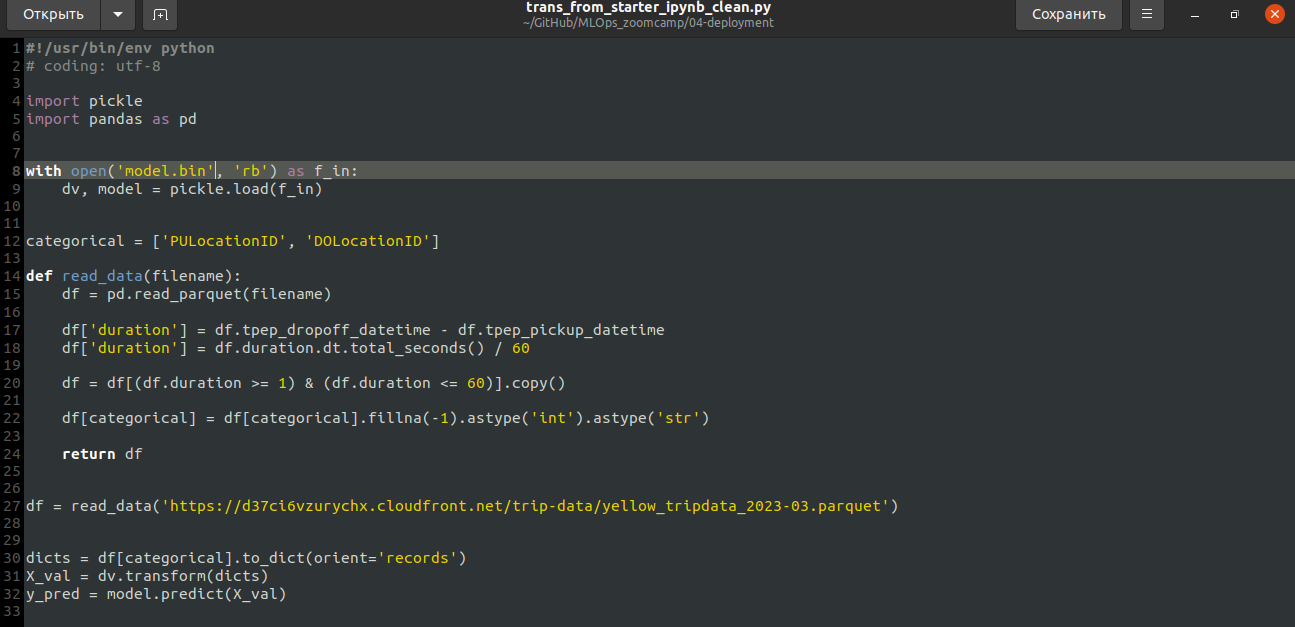

In [43]:
Image(filename='./screenshots/screenshot_Q3_hw4.png')

## ***Answer for Q3:==*** jupyter nbconvert --to script ./description_homework/starter.ipynb --output ../trans_from_starter_ipynb

## Q4. Virtual environment

Now let's put everything into a virtual environment. We'll use pipenv for that.

Install all the required libraries. Pay attention to the Scikit-Learn version: it should be the same as in the starter
notebook.

After installing the libraries, pipenv creates two files: `Pipfile`
and `Pipfile.lock`. The `Pipfile.lock` file keeps the hashes of the
dependencies we use for the virtual env.

What's the first hash for the Scikit-Learn dependency?

In [1]:
! mkdir -p hw4_web_service

In [4]:
! cd hw4_web_service

In [ ]:
! # ! pipenv install scikit-learn==1.0.2 flask --python=3.9

In [11]:
!cd hw4_web_service && ls -la

итого 32
drwxrwxr-x 2 aleksandr aleksandr  4096 июн 12 15:18 .
drwxrwxr-x 5 aleksandr aleksandr  4096 июн 12 15:16 ..
-rw-rw-r-- 1 aleksandr aleksandr   206 июн 12 15:18 Pipfile
-rw-r--r-- 1 aleksandr aleksandr 18466 июн 12 15:18 Pipfile.lock


In [ ]:
# ! nano ./hw4_web_service/Pipfile.lock

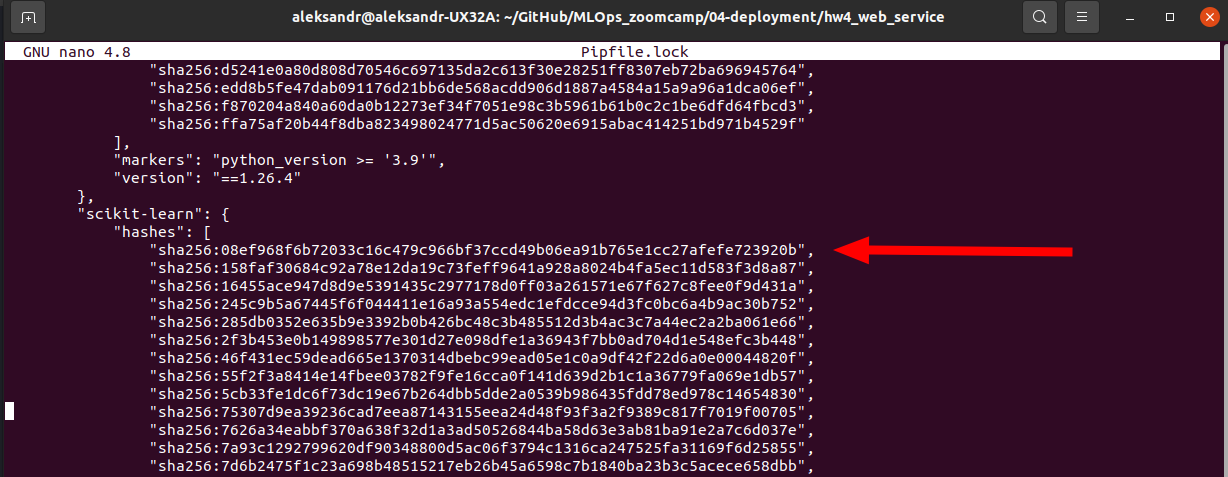

In [15]:
Image(filename='./screenshots/screenshot_Q4_hw4.png')

## ***Answer for Q4:==*** 08ef968f6b72033c16c479c966bf37ccd49b06ea91b765e1cc27afefe723920b

## Q5. Parametrize the script

Let's now make the script configurable via CLI. We'll create two 
parameters: year and month.

Run the script for April 2023. 

What's the mean predicted duration? 

* 7.29
* 14.29
* 21.29
* 28.29

Hint: just add a print statement to your script.

In [ ]:
# !pipenv install -r requirements.txt

requirements.txt


pandas==1.4.2  
click==8.0.4  
pyarrow==16.0.0  

code for calc_mean_pred.py
```python
import warnings
import click
import pickle
import pandas as pd

warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

CATEGORICAL = ['PULocationID', 'DOLocationID']

@click.command()
@click.option(
    '--year',
    type=int,
    required=True,
    help='Year of the trip data'
)
@click.option(
    '--month',
    type=int,
    required=True,
    help='Month of the trip data'
)
def main(year, month):
    with open('../description_homework/model.bin', 'rb') as f_in:
        dv, model = pickle.load(f_in)

    input_file = f'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year:04d}-{month:02d}.parquet'
    df = read_data(input_file)

    dicts = df[CATEGORICAL].to_dict(orient='records')
    X_val = dv.transform(dicts)
    y_pred = model.predict(X_val)

    print(f'Mean predicted duration: {y_pred.mean()}')

def read_data(filename):
    df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df['duration'] = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    df[CATEGORICAL] = df[CATEGORICAL].fillna(-1).astype('int').astype('str')

    return df

if __name__ == '__main__':
    main()
```

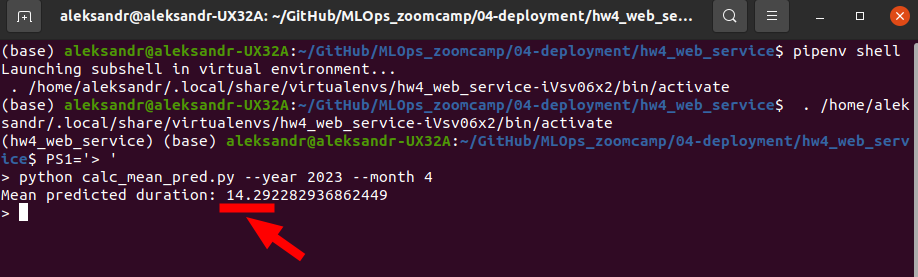

In [17]:
Image(filename='./screenshots/screenshot_Q5_hw4.png')

## ***Answer for Q5:==*** 14.29

## Q6. Docker container 

Finally, we'll package the script in the docker container. 
For that, you'll need to use a base image that we prepared. 

This is what the content of this image is:
```
FROM python:3.10.13-slim

WORKDIR /app
COPY [ "model2.bin", "model.bin" ]
```

Note: you don't need to run it. We have already done it.

It is pushed it to [`agrigorev/zoomcamp-model:mlops-2024-3.10.13-slim`](https://hub.docker.com/layers/agrigorev/zoomcamp-model/mlops-2024-3.10.13-slim/images/sha256-f54535b73a8c3ef91967d5588de57d4e251b22addcbbfb6e71304a91c1c7027f?context=repo),
which you need to use as your base image.

That is, your Dockerfile should start with:

```docker
FROM agrigorev/zoomcamp-model:mlops-2024-3.10.13-slim

# do stuff here
```

This image already has a pickle file with a dictionary vectorizer
and a model. You will need to use them.

Important: don't copy the model to the docker image. You will need
to use the pickle file already in the image. 

Now run the script with docker. What's the mean predicted duration
for May 2023? 

* 0.19
* 7.24
* 14.24
* 21.19

Lets explorer Alexey's docker file

exploration.dockerfile

---
```
FROM agrigorev/zoomcamp-model:mlops-2024-3.10.13-slim

# Show installed Python packages
RUN pip list > /installed_python_packages.txt

# Set the default command to bash
CMD ["/bin/bash"]
```


In [2]:
# ! docker build -f exploration.dockerfile -t exploration-image .
# ! docker run -it exploration-image

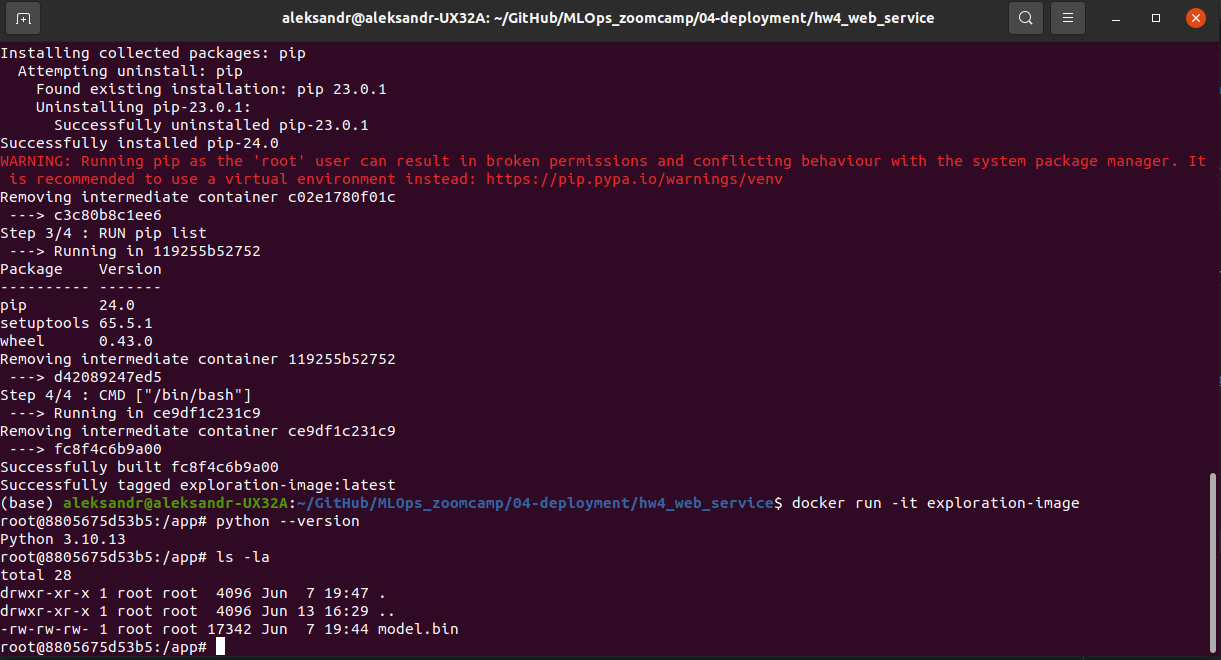

In [4]:
Image(filename='./screenshots/screenshot_Q6_hw4.png')

In [ ]:
# ! docker ps
# ! docker cp 66f17cb52438:/app/model.bin /home/aleksandr/GitHub/MLOps_zoomcamp/04-deployment/hw4_web_service/model_from_docker.bin

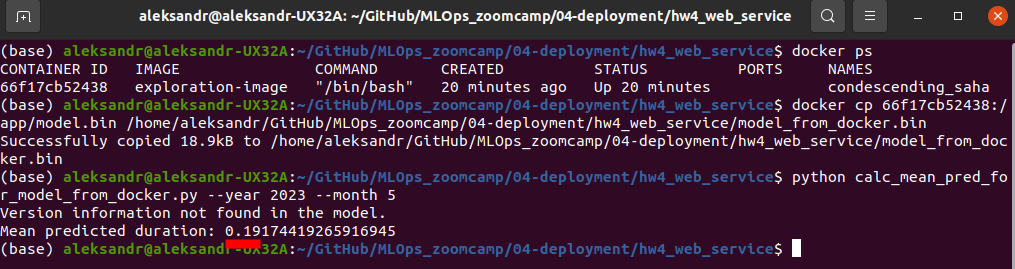

In [2]:
Image(filename='./screenshots/screenshot_Q6_hw4_2.png')

Dockerfile

```
FROM agrigorev/zoomcamp-model:mlops-2024-3.10.13-slim

WORKDIR /app

# Copy script and reqs.txt for docker to working directory
COPY calc_mean_pred_for_docker.py .
COPY requirements_for_docker.txt .

# Install necessary libraries
RUN pip install --upgrade pip
RUN pip install -r requirements_for_docker.txt

# Run script for docker with parameters for May 2023
CMD ["python", "calc_mean_pred_for_docker.py", "--year", "2023", "--month", "5"]
```

requirements_for_docker.txt 

```
pandas==1.4.2
click==8.0.4
pyarrow==16.0.0
scikit-learn==1.0.2
```

code for calc_mean_pred_for_docker.py

```python
import warnings
import click
import pickle
import pandas as pd

warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

CATEGORICAL = ['PULocationID', 'DOLocationID']

@click.command()
@click.option(
    '--year',
    type=int,
    required=True,
    help='Year of the trip data'
)
@click.option(
    '--month',
    type=int,
    required=True,
    help='Month of the trip data'
)
def main(year, month):
    with open('model.bin', 'rb') as f_in:
        dv, model = pickle.load(f_in)

    input_file = f'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year:04d}-{month:02d}.parquet'
    df = read_data(input_file)

    dicts = df[CATEGORICAL].to_dict(orient='records')
    X_val = dv.transform(dicts)
    y_pred = model.predict(X_val)

    print(f'Mean predicted duration: {y_pred.mean()}')

def read_data(filename):
    df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df['duration'] = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    df[CATEGORICAL] = df[CATEGORICAL].fillna(-1).astype('int').astype('str')

    return df

if __name__ == '__main__':
    main()

```

In [ ]:
# ! docker build -t hw4-mlops-model .
# ! docker run -it hw4-mlops-model

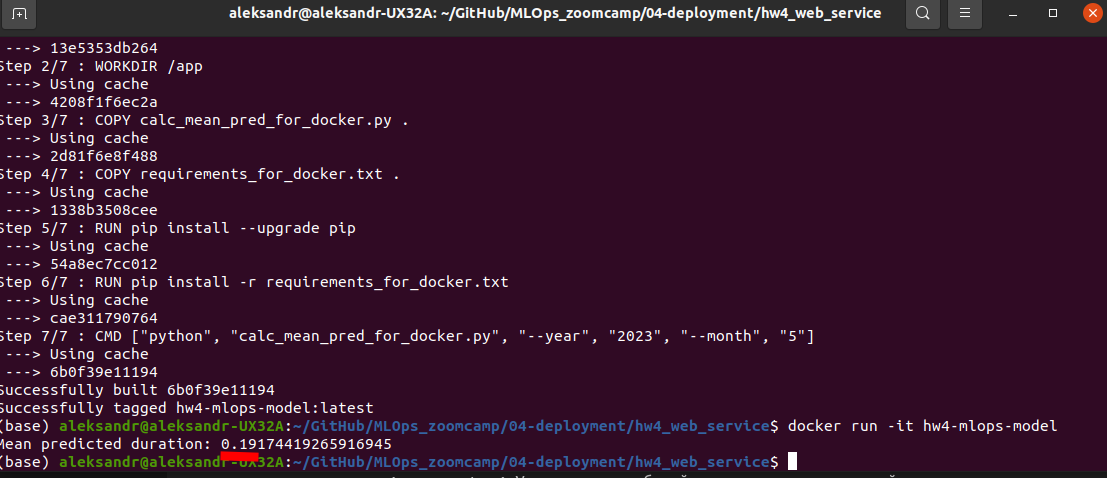

In [4]:
Image(filename='./screenshots/screenshot_Q6_hw4_3.png')

## ***Answer for Q6:==*** 0.19